## Problem Statement
To make ARIMA model over shampoo sales data and check the MSE between predicted and actual value

In [19]:
# importing the packages
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot

In [20]:
# Defining the function for parser
def parser(x):
    print(x)
    return datetime.strptime('19'+x,'%Y-%b')

In [21]:
# reading the data from the file
series_data = read_csv('sales-of-shampoo-over-a-three-ye.csv',header=0,parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)

['01-Jan' '01-Feb' '01-Mar' '01-Apr' '01-May' '01-Jun' '01-Jul' '01-Aug'
 '01-Sep' '01-Oct' '01-Nov' '01-Dec' '02-Jan' '02-Feb' '02-Mar' '02-Apr'
 '02-May' '02-Jun' '02-Jul' '02-Aug' '02-Sep' '02-Oct' '02-Nov' '02-Dec'
 '03-Jan' '03-Feb' '03-Mar' '03-Apr' '03-May' '03-Jun' '03-Jul' '03-Aug'
 '03-Sep' '03-Oct' '03-Nov' '03-Dec']
01-Jan
01-Feb
01-Mar
01-Apr
01-May
01-Jun
01-Jul
01-Aug
01-Sep
01-Oct
01-Nov
01-Dec
02-Jan
02-Feb
02-Mar
02-Apr
02-May
02-Jun
02-Jul
02-Aug
02-Sep
02-Oct
02-Nov
02-Dec
03-Jan
03-Feb
03-Mar
03-Apr
03-May
03-Jun
03-Jul
03-Aug
03-Sep
03-Oct
03-Nov
03-Dec


In [22]:
series_data.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

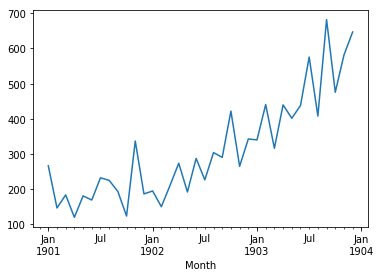

In [23]:
# Plotting the series data
series_data.plot()
pyplot.show()

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


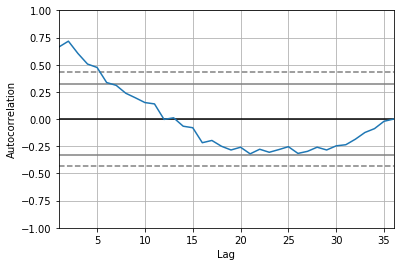

In [24]:
# Auto correlation plot 
autocorrelation_plot(series_data)
pyplot.show()

In [25]:
# fit ARIMA model
AR_model = ARIMA(series_data, order=(5,1,0))
model_fit = AR_model.fit(disp=0)
print(model_fit.summary())

C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Wed, 08 May 2019   AIC                            406.340
Time:                                                 22:50:36   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

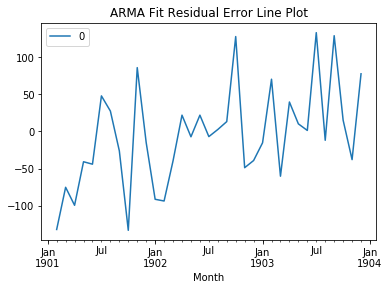

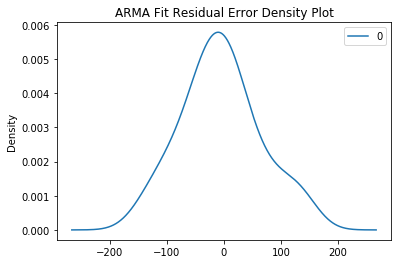

                0
count   35.000000
mean    -5.495295
std     68.132877
min   -133.296686
25%    -42.477964
50%     -7.186673
75%     24.748258
max    133.237889


In [26]:
# plotting residual errors
import pandas as pd
import matplotlib.pyplot as plt
residuals_val = pd.DataFrame(model_fit.resid)
residuals_val.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals_val.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals_val.describe())

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=349.117669, expected=342.300000
predicted=306.513025, expected=339.700000
predicted=387.376423, expected=440.400000
predicted=348.154259, expected=315.900000
predicted=386.308819, expected=439.300000
predicted=356.082056, expected=401.300000
predicted=446.379526, expected=437.400000
predicted=394.737264, expected=575.500000
predicted=434.915601, expected=407.600000
predicted=507.923413, expected=682.000000
predicted=435.482930, expected=475.300000
predicted=652.743793, expected=581.300000
predicted=546.343499, expected=646.900000
Test MSE: 6958.326


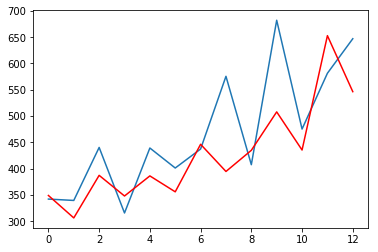

In [27]:
# Reading the values and splitting the data into train and test
series_val = series_data.values
size = int(len(series_val) * 0.66)
train, test = series_val[0:size], series_val[size:len(series_val)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error_val = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error_val)

# plotting the test and predictions
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()